<a href="https://colab.research.google.com/github/ilirsheraj/DUDL/blob/main/Chapter_04_ANN_Part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ANN Regression

In [1]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from IPython import display
display.set_matplotlib_formats("svg")

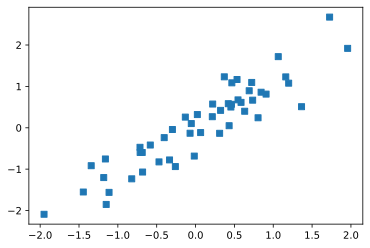

In [ ]:
# create 50 data points
N = 50
x = torch.randn(N,1)

# Add some extra noise to x to make prediction even more difficult
y = x + torch.randn(N,1)/2

# Plot to see
plt.plot(x,y, "s")
plt.show()

In [ ]:
# Build the Model
ANNreg = nn.Sequential(
    nn.Linear(1,1),  # input layer (# of input, # of output), We can set bias=False
    nn.ReLU(),       # activation function
    nn.Linear(1,1)   # output layer (# of input, # of output)
    )

ANNreg

Sequential(
  (0): Linear(in_features=1, out_features=1, bias=True)
  (1): ReLU()
  (2): Linear(in_features=1, out_features=1, bias=True)
)

In [ ]:
# Define metaparameters
learningRate = 0.05

# loss function Mean-Squared Error
lossfun = nn.MSELoss()

# Optimizer (the flavor of Gradient Descent to implement)
optimizer = torch.optim.SGD(ANNreg.parameters(),lr = learningRate)

In [ ]:
# Train the model
numepochs = 500
losses = torch.zeros(numepochs)

# Train the model
for epochi in range(numepochs):

    # forward pass (pass x to the deep learning model and get prediction)
    yHat = ANNreg(x)

    # compute loss (predicted vs observed values)
    loss = lossfun(yHat,y)

    # Save the loss for each epoch to visulize later
    losses[epochi] = loss

    # backpropagation
    optimizer.zero_grad() # initialize the gradient to set all derivatives as zero
    loss.backward() # implements backpropagation
    optimizer.step() # calls SDG

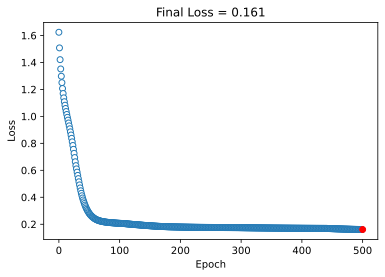

In [ ]:
# Show the losses
# Compute the losses manually
# final forward pass
predictions = ANNreg(x)

# final loss (MSE)
# mean((predictions - actual)**2)
testloss = (predictions - y).pow(2).mean()

plt.plot(losses.detach(), "o", markerfacecolor="w", linewidth=0.1)
plt.plot(numepochs, testloss.detach(), "ro")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Final Loss = {:.3f}".format(testloss.item()))
plt.show()

In [ ]:
testloss

tensor(0.1607, grad_fn=<MeanBackward0>)

In [ ]:
testloss.detach() # detaches the number testloss.item() is the same

tensor(0.1607)

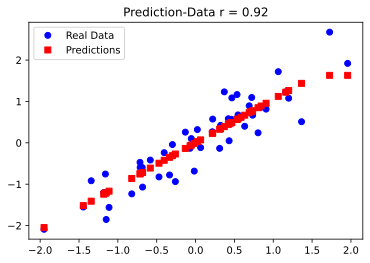

In [ ]:
# Plot the data
plt.plot(x,y,"bo", label = "Real Data")
plt.plot(x, predictions.detach(), "rs", label="Predictions")
plt.title("Prediction-Data r = {:.2f}".format(np.corrcoef(y.T, predictions.detach().T)[0,1]))
plt.legend()
plt.show()

In [ ]:
np.corrcoef(y.T, predictions.detach().T)

array([[1.        , 0.91567682],
       [0.91567682, 1.        ]])

### Additional Explorations

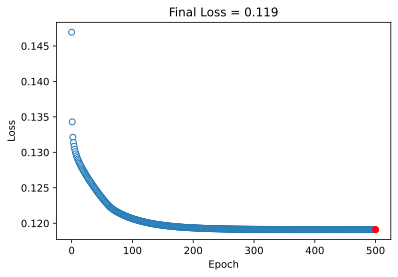

In [ ]:
# How much data is "enough"? Try different values of N and see how low the loss gets. 
# Do you still get low loss ("low" is subjective, but let's say loss<.25) with N=10? N=5?
n = 15
x2 = torch.randn(n,1)
y2 = x2 + torch.randn(n,1)/2

numepochs = 500
losses = torch.zeros(numepochs)

for epochi in range(numepochs):

    yHat2 = ANNreg(x2)
    loss = lossfun(yHat2,y2)
    losses[epochi] = loss
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

predictions2 = ANNreg(x2)

testloss = (predictions2 - y2).pow(2).mean()

plt.plot(losses.detach(), "o", markerfacecolor="w", linewidth=0.1)
plt.plot(numepochs, testloss.detach(), "ro")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Final Loss = {:.3f}".format(testloss.item()))
plt.show()

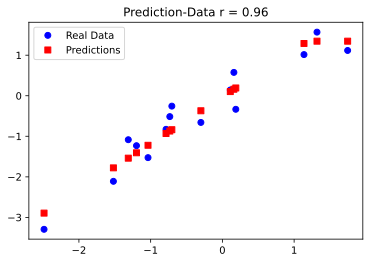

In [ ]:
# Plot the data
plt.plot(x2,y2,"bo", label = "Real Data")
plt.plot(x2, predictions2.detach(), "rs", label="Predictions")
plt.title("Prediction-Data r = {:.2f}".format(np.corrcoef(y2.T, predictions2.detach().T)[0,1]))
plt.legend()
plt.show()

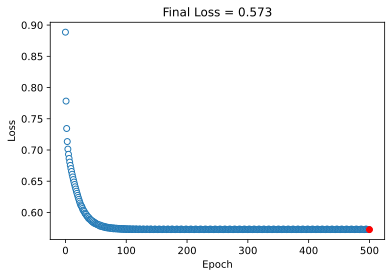

In [ ]:
# Change Noise Level
n = 15
x2 = torch.randn(n,1)
y2 = x2 + torch.randn(n,1)

numepochs = 500
losses = torch.zeros(numepochs)

for epochi in range(numepochs):

    yHat2 = ANNreg(x2)
    loss = lossfun(yHat2,y2)
    losses[epochi] = loss
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

predictions2 = ANNreg(x2)

testloss = (predictions2 - y2).pow(2).mean()

plt.plot(losses.detach(), "o", markerfacecolor="w", linewidth=0.1)
plt.plot(numepochs, testloss.detach(), "ro")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Final Loss = {:.3f}".format(testloss.item()))
plt.show()

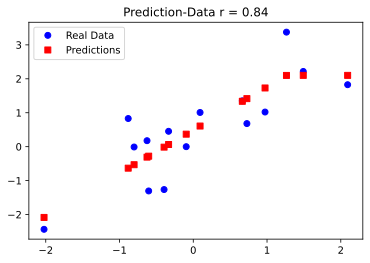

In [ ]:
# Plot the data
plt.plot(x2,y2,"bo", label = "Real Data")
plt.plot(x2, predictions2.detach(), "rs", label="Predictions")
plt.title("Prediction-Data r = {:.2f}".format(np.corrcoef(y2.T, predictions2.detach().T)[0,1]))
plt.legend()
plt.show()

In [ ]:
100*abs((losses.detach()[-1] - losses.detach()[0])/losses.detach()[0])

tensor(35.5617)

In [ ]:
# 3) Notice that the model doesn't always work well. Put the original code (that is, N=30 and /2 noise)
#    into a function or a for-loop and repeat the training 100 times (each time using a fresh model instance).
#    Then count the number of times the model had a loss>.25.

n = 30
x = torch.randn(n,1)
y = x + torch.randn(n,1)/2

numepochs = 500
losses = torch.zeros(numepochs)
testloss = torch.zeros(100)

for i in range(100):

        # Build the Model
    ANNreg = nn.Sequential(
        nn.Linear(1,1),  # input layer
        nn.ReLU(),       # activation function
        nn.Linear(1,1)   # output layer
        )
    
    # Define metaparameters
    learningRate = 0.05
    # loss function
    lossfun = nn.MSELoss()
    # Optimizer (the flavor of Gradient Descent to implement)
    optimizer = torch.optim.SGD(ANNreg.parameters(),lr = learningRate)

    for epochi in range(numepochs):

        yHat = ANNreg(x)
        loss = lossfun(yHat,y)
#        losses[epochi] = loss
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    predictions = ANNreg(x)

    testloss[i] = (predictions - y).pow(2).mean()

In [ ]:
torch.count_nonzero(testloss[testloss > 0.25])/len(testloss)

tensor(1.)

## Code Challenge: Manipulate The Regression Slope

Set up and run a parametric experiment where we manipulate the regression slope (relationship btw x and y)

In [ ]:
# write a function to train the whole model
def my_ANNreg(x,y, numepochs = 500):

    # Build the Model
    ANNreg = nn.Sequential(
        nn.Linear(1,1),  # input layer
        nn.ReLU(),       # activation function
        nn.Linear(1,1)   # output layer
        )
    
    # Define metaparameters
    learningRate = 0.05
    # loss function
    lossfun = nn.MSELoss()
    # Optimizer (the flavor of Gradient Descent to implement)
    optimizer = torch.optim.SGD(ANNreg.parameters(),lr = learningRate)

    numepochs = numepochs
    losses = torch.zeros(numepochs)

    for epochi in range(numepochs):

        yHat = ANNreg(x)

        loss = lossfun(yHat,y)
        losses[epochi] = loss

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    predictions = ANNreg(x)

    return predictions, losses

In [ ]:
# write a function hat ceates data and outputs x and y
def create_data(m, n = 50):
    """
    m is the slope which we want to vary
    """
    x = torch.randn(n,1)
    y = m*x + torch.randn(n,1)/2
    return x,y

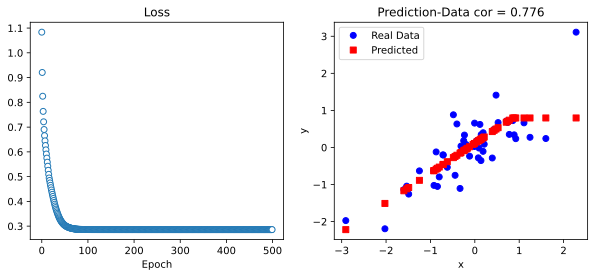

In [ ]:
# create an experimental instance
x,y = create_data(0.8)

yHat, losses = my_ANNreg(x,y, numepochs = 500)

fig,ax = plt.subplots(1,2, figsize=(10,4))

ax[0].plot(losses.detach(), "o", markerfacecolor="w", linewidth=0.1)
ax[0].set_xlabel("Epoch")
ax[0].set_title("Loss")

ax[1].plot(x,y, "bo", label = "Real Data")
ax[1].plot(x,yHat.detach(), "rs", label = "Predicted")
ax[1].set_xlabel("x")
ax[1].set_ylabel("y")
ax[1].set_title("Prediction-Data cor = {:.3f}".format(np.corrcoef(y.T,yHat.detach().T)[0,1]))
ax[1].legend()

plt.show()

In [ ]:
# vary the slope from -2 to 2 in 21 steps and train the model by repeating each experiment 50 times
slopes = np.linspace(-2,2,21)
numExp = 50

# Initialize the output matrix
results = np.zeros((len(slopes), numExp, 2))

for slopei in range(len(slopes)):

    for n in range(numExp):

        # create the dataset and run the model
        x,y = create_data(slopes[slopei])
        yHat, losses = my_ANNreg(x,y)

        # Store the final loss and performance

        results[slopei,n,0] = losses[-1]
        results[slopei,n,1] = np.corrcoef(y.T,yHat.detach().T)[0,1]

# Correlation can be NaN, set all NaN values to zero
results[np.isnan(results)] = 0

/usr/local/lib/python3.8/dist-packages/numpy/lib/function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/lib/python3.8/dist-packages/numpy/lib/function_base.py:2692: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


In [ ]:
results[:,:,0]

array([[0.34196416, 0.21504207, 0.28594741, ..., 0.34431171, 0.24232367,
        4.08979321],
       [0.34999695, 3.07809258, 2.475806  , ..., 0.37957448, 0.23281109,
        0.15831688],
       [3.53719735, 0.32580689, 0.16490337, ..., 0.33830658, 0.21763095,
        0.27917707],
       ...,
       [2.71913671, 0.25120664, 0.22122064, ..., 0.21017867, 0.19993393,
        3.01914859],
       [0.26489642, 0.24229774, 2.94634795, ..., 0.29939014, 0.20716873,
        0.27889413],
       [0.16407014, 0.23740855, 5.0565505 , ..., 0.19097948, 5.13597345,
        0.29454833]])

In [ ]:
results[:, :, 1]

array([[0.96032148, 0.94652371, 0.95471893, ..., 0.95839155, 0.97171282,
        0.        ],
       [0.95911616, 0.        , 0.        , ..., 0.9531672 , 0.95852643,
        0.95668441],
       [0.        , 0.91698115, 0.97057679, ..., 0.94273963, 0.95054803,
        0.94791535],
       ...,
       [0.        , 0.95333718, 0.96506813, ..., 0.94312479, 0.96945963,
        0.        ],
       [0.95169584, 0.97694015, 0.        , ..., 0.93133369, 0.96769862,
        0.94448538],
       [0.9790344 , 0.96710505, 0.        , ..., 0.96235849, 0.        ,
        0.96357721]])

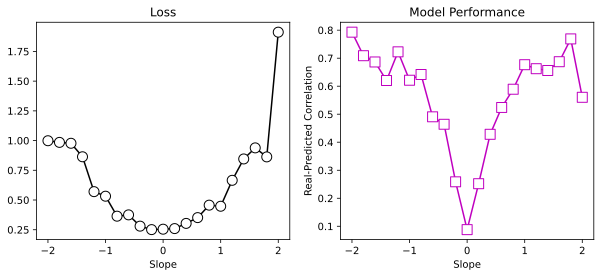

In [ ]:
# plot loss and accuracy (correlation yhat,y) as a function of slope
fig,ax = plt.subplots(1,2, figsize=(10,4))

ax[0].plot(slopes, np.mean(results[:,:,0],axis=1), "ko-", markerfacecolor="w", markersize=10)
ax[0].set_xlabel("Slope")
ax[0].set_title("Loss")

ax[1].plot(slopes, np.mean(results[:,:,1],axis=1), "ms-", markerfacecolor="w", markersize=10)
ax[1].set_xlabel("Slope")
ax[1].set_ylabel("Real-Predicted Correlation")
ax[1].set_title("Model Performance")

plt.show()

## ANN for Classification

In [18]:
# Create the data
nPerClust = 100 # number of data points
blur = 1 # standard deviation

A = [1,1] # Center of A Cluster
B = [5,1] # Center of B Cluster

# generate the data
a = [A[0]+np.random.randn(nPerClust)*blur, A[1]+np.random.randn(nPerClust)*blur]
b = [B[0]+np.random.randn(nPerClust)*blur, B[1]+np.random.randn(nPerClust)*blur]

# true labels
labels_np = np.vstack((np.zeros((nPerClust,1)), np.ones((nPerClust,1))))

# concatenate into a matrix
data_np = np.hstack((a,b)).T

# Convert to a pytorch tensor
data = torch.tensor(data_np).float()
labels = torch.tensor(labels_np).float()

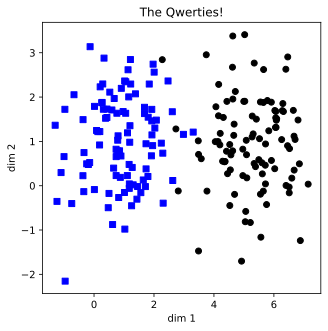

In [19]:
# Plot
fig = plt.figure(figsize=(5,5))
plt.plot(data[np.where(labels==0)[0],0], data[np.where(labels==0)[0],1],"bs")
plt.plot(data[np.where(labels==1)[0],0], data[np.where(labels==1)[0],1],"ko")
plt.title("The Qwerties!")
plt.xlabel("dim 1")
plt.ylabel("dim 2")
plt.show()

In [20]:
# inspect the datatypes
print(type(data_np))
print()
print(np.shape(data_np))
print()
print(type(data))
print()
print(np.shape(data))

<class 'numpy.ndarray'>

(200, 2)

<class 'torch.Tensor'>

torch.Size([200, 2])


In [27]:
# Let's build the model
ANNclassify = nn.Sequential(
    nn.Linear(2,1), # input layer: two classes
    nn.ReLU(),      # activation unit
    nn.Linear(1,1), # output unit
    nn.Sigmoid(),   # Final activation unit
    )

ANNclassify

Sequential(
  (0): Linear(in_features=2, out_features=1, bias=True)
  (1): ReLU()
  (2): Linear(in_features=1, out_features=1, bias=True)
  (3): Sigmoid()
)

In [28]:
# Add other model features
learningRate = 0.01

# define loss function
lossfun = nn.BCELoss() # Will return to this subject later (Binary Cross Entropy (BCE))

# optimizer
optimizer = torch.optim.SGD(ANNclassify.parameters(), lr = learningRate)

In [29]:
# Train the model
numepochs = 1000
losses = torch.zeros(numepochs)

for epochi in range(numepochs):

    # forward pass
    yHat = ANNclassify(data)

    # compute loss
    loss = lossfun(yHat, labels)
    losses[epochi] = loss

    # backpropagation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

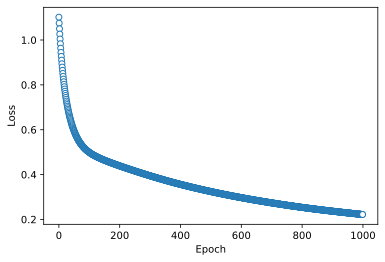

In [30]:
# Plot the losses
plt.plot(losses.detach(), "o", markerfacecolor="w",linewidth=0.1)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

In [31]:
# Compute the predictions
predictions = ANNclassify(data)

predlabels = predictions > 0.5

# find errors
misclassified = np.where(predlabels != labels)[0]

# total accuracy
totalacc = 100 - 100*len(misclassified)/(2*nPerClust)

print("The final accuracy is {:.3f}%".format(totalacc))
print(predictions[:10])
print(predlabels[:10])
print(misclassified)

The final accuracy is 96.500%
tensor([[0.3536],
        [0.1768],
        [0.1768],
        [0.2006],
        [0.1768],
        [0.3755],
        [0.2411],
        [0.1860],
        [0.3246],
        [0.1768]], grad_fn=<SliceBackward0>)
tensor([[False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False]])
[ 29  35  40  46  80  93 127]


[]

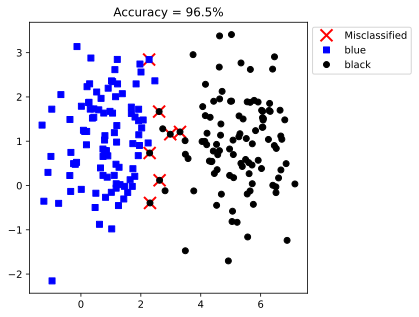

In [32]:
# Plot the labeled data
fig = plt.figure(figsize=(5,5))
plt.plot(data[misclassified,0], data[misclassified,1], "rx", markersize=12, markeredgewidth=2)
plt.plot(data[np.where(~predlabels)[0],0], data[np.where(~predlabels)[0],1], "bs")
plt.plot(data[np.where(predlabels)[0],0], data[np.where(predlabels)[0],1], "ko")

plt.legend(["Misclassified", "blue", "black"], bbox_to_anchor=(1,1))
plt.title("Accuracy = {}%".format(totalacc))
plt.plot()

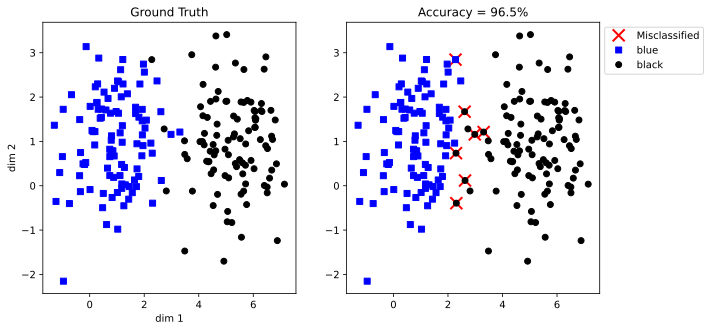

In [33]:
# Put all together
fig, ax = plt.subplots(1,2,figsize=(10,5))
ax[0].plot(data[np.where(labels==0)[0],0], data[np.where(labels==0)[0],1],"bs")
ax[0].plot(data[np.where(labels==1)[0],0], data[np.where(labels==1)[0],1],"ko")
ax[0].set_title("Ground Truth")
ax[0].set_xlabel("dim 1")
ax[0].set_ylabel("dim 2")

ax[1].plot(data[misclassified,0], data[misclassified,1], "rx", markersize=12, markeredgewidth=2)
ax[1].plot(data[np.where(~predlabels)[0],0], data[np.where(~predlabels)[0],1], "bs")
ax[1].plot(data[np.where(predlabels)[0],0], data[np.where(predlabels)[0],1], "ko")
ax[1].legend(["Misclassified", "blue", "black"], bbox_to_anchor=(1,1))
ax[1].set_title("Accuracy = {}%".format(totalacc))

plt.show()

## Larning Rate Comparisons


Use the same dataset as above, but this time change the learning rate and see model accuracy with different learning rates

In [35]:
# Use the same data
def my_ANNclassify(learningrate):

    # Let's build the model
    ANNclassify = nn.Sequential(
        nn.Linear(2,1), # input layer: two classes
        nn.ReLU(),      # activation unit
        nn.Linear(1,1), # output unit
#        nn.Sigmoid(),   # Final activation unit (used BCEWith ..., no need for sigmoid)
        )
    
    # define loss function
    lossfun = nn.BCEWithLogitsLoss() #the output of linear unit

    # optimizer
    optimizer = torch.optim.SGD(ANNclassify.parameters(), lr = learningrate)

    # return the output
    return ANNclassify, lossfun, optimizer

In [36]:
# Another function to train the model
numepochs = 1000

def trainTheModel(ANNclassify):

    # Initialize losses
    losses = torch.zeros(numepochs)

    #loop over
    for epochi in range(numepochs):

        # forward pass
        yHat = ANNclassify(data)

        # compute loss
        loss = lossfun(yHat, labels)
        losses[epochi] = loss

        # backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    # Final Forward Pass
    predictions = ANNclassify(data)

    # Accuracy: we didnt use sigmoid here
    totalacc = 100*torch.mean(((predictions>0) == labels).float())

    return losses, predictions, totalacc

In [37]:
# Run a test
ANNclassify, lossfun, optimizer = my_ANNclassify(0.01)

# Run the model
losses, predictions, totalacc = trainTheModel(ANNclassify)

# Print accuracy
print("Model Accuracy is {}%".format(totalacc))

Model Accuracy is 97.5%


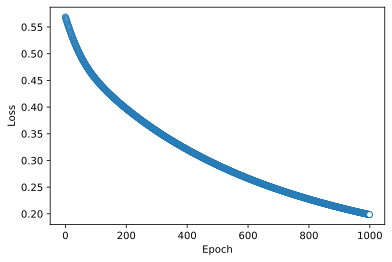

In [38]:
# Plot the losses
plt.plot(losses.detach(), "o", markerfacecolor="w", linewidth=0.1)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

In [39]:
# For the experiment, we will test 40 different learning rates
learningrates = np.linspace(0.001, 0.1, 40)

# initialize the results output
accByLR = []
allLosses = np.zeros((len(learningrates), numepochs))

for i, lr in enumerate(learningrates):

    # Create the model
    ANNclassify, lossfun, optimizer = my_ANNclassify(lr)
    losses, predictions, totalacc = trainTheModel(ANNclassify)

    # store the results
    accByLR.append(totalacc)
    allLosses[i,:] = losses.detach()

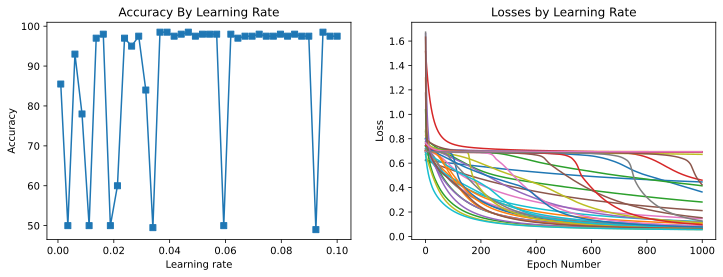

In [40]:
fig,ax = plt.subplots(1,2,figsize=(12,4))

ax[0].plot(learningrates, accByLR, "s-")
ax[0].set_xlabel("Learning rate")
ax[0].set_ylabel("Accuracy")
ax[0].set_title("Accuracy By Learning Rate")

ax[1].plot(allLosses.T)
ax[1].set_title("Losses by Learning Rate")
ax[1].set_xlabel("Epoch Number")
ax[1].set_ylabel("Loss")
 
plt.show()

In [41]:
# Proportion of runs where the model had min 70% accuracy
sum(torch.tensor(accByLR)>70)/len(accByLR)

tensor(0.8250)

In [42]:
# Rerun the same experiment above 50 times and average the results
# Number of iterations
numExps = 50

# matrix to store all the results
accMeta = np.zeros((numExps, len(learningrates)))

# reduce the number of epochs for efficiency
numepochs = 500

for expi in range(numExps):
    for i, lr in enumerate(learningrates):

        # Create and run the model
        ANNclassify, lossfun, optimizer = my_ANNclassify(lr)
        losses, predictions, totalacc = trainTheModel(ANNclassify)

        # store the results
        accMeta[expi,i] = totalacc

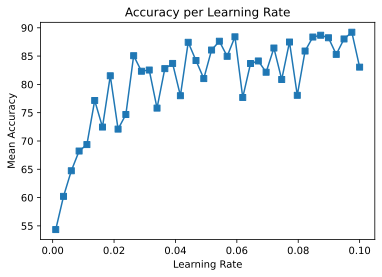

In [43]:
plt.plot(learningrates, np.mean(accMeta,axis=0), "s-")
plt.xlabel("Learning Rate")
plt.ylabel("Mean Accuracy")
plt.title("Accuracy per Learning Rate")
plt.show()